In [1]:
import numpy as np
import matplotlib.pyplot as plt

from f3dasm.simulation.benchmark_functions import Levy

In [2]:
px = 10

In [3]:
l = Levy(noise=True,seed=42)

In [4]:
x1 = np.linspace(0, 1, num=px)
x2 = np.linspace(0, 1, num=px)
X1, X2 = np.meshgrid(x1, x2)

X1.ravel()

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ,
       0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ,
       0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ,
       0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ,
       0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ,
       0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ,
       0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ,
       0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='$X_{1}$', ylabel='$X_{2}$'>)

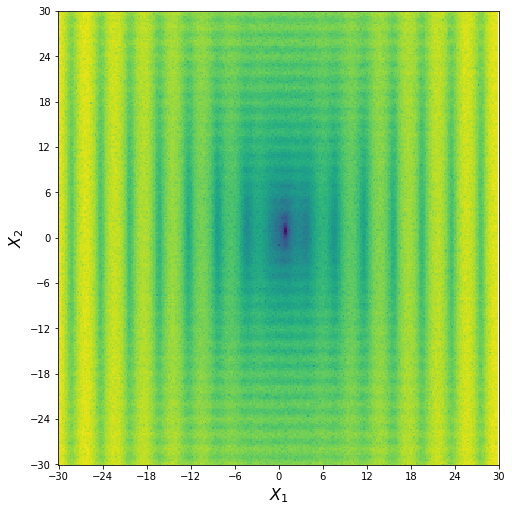

In [5]:
l.plot(orientation='2D', domain=[-30,30])

(<Figure size 504x504 with 1 Axes>,
 <Axes3DSubplot:xlabel='$X_{1}$', ylabel='$X_{2}$'>)

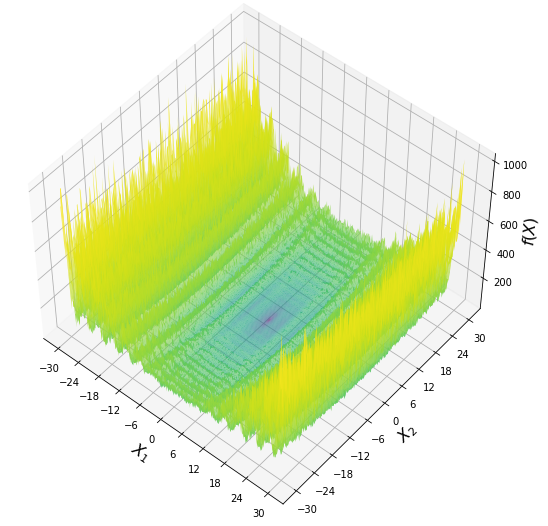

In [6]:
l.plot(orientation='3D', domain=[-30,30])

In [10]:
y = l.eval(np.array([1.0]))
y

array([[1.04264162e-32]])